In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,Galactocentric,CartesianDifferential
import astropy.units as u
import astropy.coordinates as coord
import h5py
%matplotlib inline

In [328]:
# mg,bp_rp,ra,dec,parallax,phot_g_mean_mag
#data = np.genfromtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skip_header=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
#data = np.loadtxt('/Users/nondh/Downloads/sample_50000-result.csv', skiprows=1,delimiter=',')
def read_real_data():
    #data1 = np.loadtxt('/Users/nondh/Downloads/full_4kpc-result.csv', skiprows=1,delimiter=',')
    #data2 = np.loadtxt('frontside_100pc-result.csv', skiprows=1,delimiter=',')
    #data = np.vstack((data1, data2))
    data = np.loadtxt('/Users/nondh/Downloads/backside_2kpc-result.csv', skiprows=1,delimiter=',')
    c = coord.ICRS(ra=data[:,2] * u.degree,
                dec=data[:,3] * u.degree,
                distance=(1./data[:,4]) * u.kpc)

    gcentric = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s)))
    gcentric.representation = 'cylindrical'
    
    n = np.append(np.where((gcentric.phi > 175*u.deg))[0], np.where((gcentric.phi < -175*u.deg))[0])
    gcentric = gcentric[n]
    return gcentric, (data[:,:2])[n]

In [236]:
def pick_subgroup(gcentric, dat, minmag=2.5, maxmag=3, gmin=5):
    return gcentric[np.where((dat[:,0]>gmin) & (dat[:,1] > minmag) & (dat[:,1] < maxmag))]

In [ ]:
gcentric, dat = read_real_data()

In [225]:
print len(gcentric), len(dat)

16452345 16452345


In [237]:
g_sub = pick_subgroup(gcentric, dat)

In [238]:
len(g_sub)

1241211

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(7.00110693, -179.41186782, -1.32439469),
     (7.71913595, -179.8094146 , -0.581499  ),
     (8.78466438, -177.56685867, -0.23079826), ...,
     (7.53399351, -179.9957313 , -0.51258861),
     (7.64089951, -179.99862079, -0.42453363),
     (7.97327681, -179.99772466, -0.20310101)]>

8290458

# Read in the data from mock catalogue

using m12f lsr0

In [ ]:
for i in range(10):
    loc = '/mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/lsr_0/lsr-0-rslice-{}.m12f-res7100-md-sliced-gcat-dr2.hdf5'.format(i)
    f = h5py.File(loc, 'r')
    
    # pick high latitude stars
    i_high = np.where((f['parallax'][:]>0.25) & (f['parallax_over_error'][:] > 10) & ((f['b'][:] > 20) | (f['b'][:] < -20)) )[0]
    
    # pick backside
    i_back = np.where((f['parallax'][:]>0.5) & (f['parallax_over_error'][:] > 10) & (f['b'][:] < 20) & (f['b'][:] > -20) & ((f['l'] >90) | (f['l'] < -90)))[0]
    
    # prick frontside
    i_front = np.where((f['parallax'][:]>10) & (f['parallax_over_error'][:] > 10) & (f['b'][:] < 20) & (f['b'][:] > -20) & (f['l'] <90) & (f['l'] > -90))[0]
    
    i_all = np.append(i_high, i_back)
    i_all = np.append(i_all, i_front)
    
    mock_ra = f['ra'][:][i_all]
    mock_dec = f['dec'][:][i_all]
    mock_parallax = f['parallax'][:][i_all]
    mock_bprp = f['bp_rp'][:][i_all]
    mock_bprp_int = f['bp_rp_int'][:][i_all]
    mock_phot_g_mean_mag = f['phot_g_mean_mag'][:][i_all]
    mock_phot_g_mean_mag_int = f['phot_g_mean_mag_int'][:][i_all]
    
    mock_dist = 1/mock_parallax # in kpc
    mock_G = mock_phot_g_mean_mag - 10 + 5*np.log10(mock_parallax)
    mock_G_int = mock_phot_g_mean_mag_int - 10 + 5*np.log10(mock_parallax)
    
    dat_i = np.column_stack((mock_ra, mock_dec, mock_dist, mock_G, mock_bprp, mock_G_int, mock_bprp_int))
    

In [173]:
f = h5py.File('lsr-2-rslice-0.m12i-res7100-md-sliced-gcat-dr2.hdf5', 'r')

In [174]:
# List all groups
f.keys()

[u'A0',
 u'a_g_bp_val',
 u'a_g_rp_val',
 u'a_g_val',
 u'age',
 u'alpha',
 u'b',
 u'b_true',
 u'bp_g',
 u'bp_g_int',
 u'bp_g_true',
 u'bp_rp',
 u'bp_rp_int',
 u'bp_rp_true',
 u'calcium',
 u'carbon',
 u'dec',
 u'dec_error',
 u'dec_true',
 u'dhel_true',
 u'dmod_true',
 u'e_bp_min_rp_val',
 u'ebv',
 u'feh',
 u'g_rp',
 u'g_rp_int',
 u'g_rp_true',
 u'helium',
 u'l',
 u'l_true',
 u'logg',
 u'lognh',
 u'lum_val',
 u'mact',
 u'magnesium',
 u'mini',
 u'mtip',
 u'neon',
 u'nitrogen',
 u'oxygen',
 u'parallax',
 u'parallax_error',
 u'parallax_over_error',
 u'parallax_true',
 u'parentid',
 u'partid',
 u'phot_bp_mean_mag',
 u'phot_bp_mean_mag_error',
 u'phot_bp_mean_mag_int',
 u'phot_bp_mean_mag_true',
 u'phot_g_mean_mag',
 u'phot_g_mean_mag_error',
 u'phot_g_mean_mag_int',
 u'phot_g_mean_mag_true',
 u'phot_rp_mean_mag',
 u'phot_rp_mean_mag_error',
 u'phot_rp_mean_mag_int',
 u'phot_rp_mean_mag_true',
 u'pmb_true',
 u'pmdec',
 u'pmdec_error',
 u'pmdec_true',
 u'pml_true',
 u'pmra',
 u'pmra_error',
 u'

In [26]:
ii = np.where((f['parallax'][:]>0.25) & (f['parallax_over_error'][:] > 10))[0]

In [38]:
f['parallax'][:][ii]

array([0.42745022, 0.46285138, 0.46899979, ..., 0.6278187 , 0.49750184,
       0.68114689])

In [39]:
mock_ra = f['ra'][:][ii]
mock_dec = f['dec'][:][ii]
mock_parallax = f['parallax'][:][ii]
mock_bprp = f['bp_rp'][:][ii]
mock_bprp_int = f['bp_rp_int'][:][ii]

In [31]:
c_mock = coord.ICRS(ra=mock_ra * u.degree,
                dec=mock_dec * u.degree,
                distance=(1./mock_parallax) * u.kpc)

gcentric_mock = c.transform_to(coord.Galactocentric(galcen_v_sun = coord.CartesianDifferential((11.1, -232.24, 7.25)*u.km/u.s))) 

In [32]:
gcentric_mock.representation = 'cylindrical'
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

# r-z space binning
### 0.1x0.05 kpc

## Real Gaia

In [262]:
# assuming dat's columns are in #r, theta, z
def get_bin_edges():
    r_edges = np.array(range(70,101,1))/10.
    r_edges = r_edges*u.kpc
    z_edges = np.array(range(-100,105,5))/100.
    z_edges = z_edges*u.kpc
    return r_edges, z_edges
    

In [263]:
rr, zz = get_bin_edges()
rr

<Quantity [ 7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
            8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
            9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
           10. ] kpc>

In [325]:
def pad_withNan(p):
    ii,jj = np.where(p < 1)
    for i, j in zip(ii, jj):
        p[i,j] = np.nan
    return p

In [ ]:
def get_hist(gcentric, rr, zz):
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    H = H.T
    H_new = pad_withNan(H)
    
    fig = plt.figure(figsize=((12,8)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H_new, cmap='jet')
    fig.colorbar(im, ax =ax)
    #return H, e1, e2

In [ ]:
get_hist(gcentric, rr, zz)

## Mock Gaia

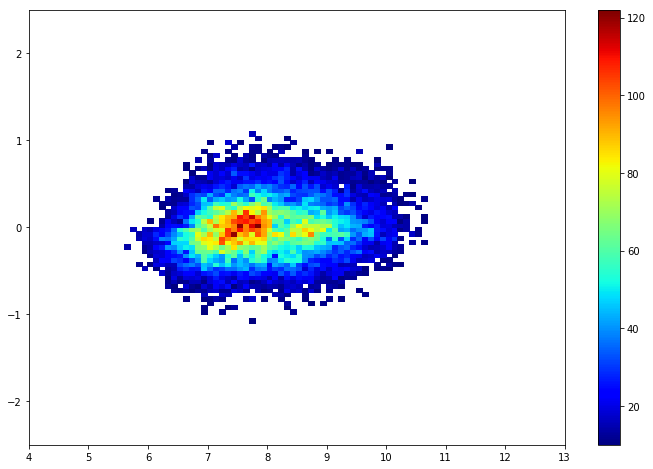

In [185]:
get_hist(gcentric_mock, rr, zz)

In [181]:
gcentric_mock

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, -232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    [(6.98671051, -148.47173225,  0.34411794),
     (7.52053847, -171.8939422 , -0.33744767),
     (8.83035248,  166.30244513, -0.04274612), ...,
     (8.22858042, -172.33932109,  0.60478393),
     (6.80723819, -174.78165177, -0.23304994),
     (8.87193722,  179.41872878,  0.04906768)]>

# MCMC Fit 

In [ ]:
import emcee

In [326]:
def get_bin_edges():
    #r_edges = np.linspace(6.5,10.1,361)*u.kpc
    #z_edges = np.linspace(-2.5,2.5,1001)*u.kpc
    r_edges = np.linspace(6.5,10.1,37)*u.kpc
    z_edges = np.linspace(-2.5,2.5,101)*u.kpc
    return r_edges, z_edges

def get_hist(gcentric):
    rr, zz = get_bin_edges()
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    H = pad_withNan(H)
    
    v = get_volume()
    for i in range(len(zz)-1):
        H[:,i] /= v
        H[:,i] *= 10**(-9)
    
    l = (len(rr)-1) * (len(zz)-1)
    r_array = np.zeros(l)*u.kpc
    z_array = np.zeros(l)*u.kpc
    val = np.zeros(l)
    r_center = 0.5*(rr[1:] + rr[:-1])
    z_center = 0.5*(zz[1:] + zz[:-1])
    k = 0
    for i, r in enumerate(r_center):
        for j, z in enumerate(z_center):
            r_array[k] = r
            z_array[k] = z
            val[k] = H[i,j]
            k += 1
    
    H = H.T
    H = np.log10(H)
    #H_new = pad_withNan(H)
    #print H_new
    fig = plt.figure(figsize=((12,6)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H, cmap='jet')
    print rr[0], rr[-1]
    ax.set_xlim(6.5, 10.1)
    ax.set_ylim(-2.5,2.5)
    ax.set_xlabel('R [kpc]', fontsize=18)
    ax.set_ylabel('z [kpc]', fontsize=18)
    ax.plot([6.5, 10.1], [0,0], linestyle = 'dashed', linewidth=3, c='black')
    fig.colorbar(im, ax =ax, label='Log10 Number Density [1/pc^3]')
    #fig.savefig('star_dist.png', dpi=300)
    
    return r_array, z_array, val


def get_volume():
    rr = np.linspace(6.5,10.1,37)
    height = 0.05
    v = np.zeros(len(rr)-1)
    i = 0
    for r1, r2 in zip(rr[:-1], rr[1:]):
        v[i] = (1/36.) * np.pi * (r2**2 - r1**2) * height
        i += 1
    return v


In [41]:
data_g = np.loadtxt('real_175cut_gstar.txt')

6.5 kpc 10.1 kpc


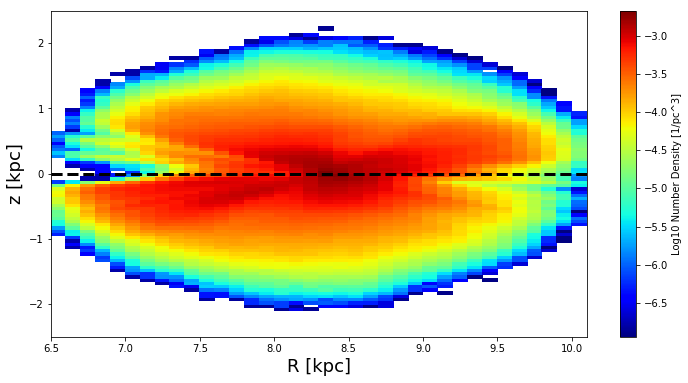

In [327]:
c = coord.ICRS(ra=data_g[:,2] * u.degree,
            dec=data_g[:,3] * u.degree,
            distance=(1./data_g[:,4]) * u.kpc)

gcentric = c.transform_to(coord.Galactocentric)
gcentric.representation = 'cylindrical'
r_array, z_array, val = get_hist(gcentric)

6.5 kpc 10.1 kpc


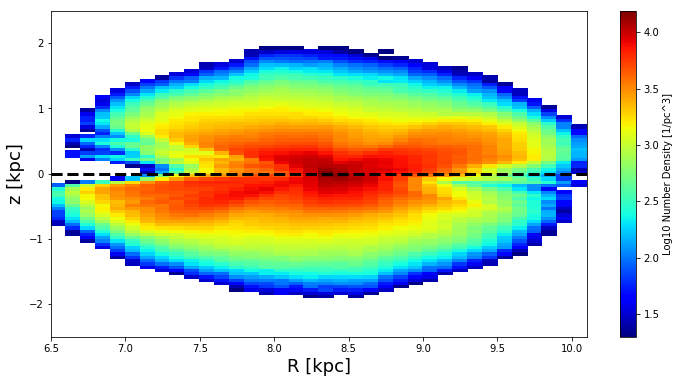

In [313]:
    rr, zz = get_bin_edges()
    H, e1, e2 = np.histogram2d(gcentric.rho, gcentric.z, bins=(rr, zz))
    H = pad_withNan(H)
    
    H = H.T
    H = np.log10(H)
    #H_new = pad_withNan(H)
    #print H_new
    fig = plt.figure(figsize=((12,6)))
    ax = fig.add_subplot(1,1,1)
    X, Y = np.meshgrid(e1, e2)
    im = ax.pcolormesh(X, Y, H, cmap='jet')
    print rr[0], rr[-1]
    ax.set_xlim(6.5, 10.1)
    ax.set_ylim(-2.5,2.5)
    ax.set_xlabel('R [kpc]', fontsize=18)
    ax.set_ylabel('z [kpc]', fontsize=18)
    ax.plot([6.5, 10.1], [0,0], linestyle = 'dashed', linewidth=3, c='black')
    fig.colorbar(im, ax =ax, label='Log10 Number Density [1/pc^3]')

In [ ]:
c = coord.ICRS(ra= * u.degree,
            dec=data_g[:,3] * u.degree,
            distance=(1) * u.kpc)

gcentric = c.transform_to(coord.Galactocentric)
gcentric.representation = 'cylindrical'

In [300]:
new_val = val[np.isnan(val) == False]
r_array = r_array[np.isnan(val) == False]
z_array = z_array[np.isnan(val) == False]

In [281]:
len(r_array)

2107

In [186]:
new_val_val = new_val * 10*9

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [228]:
def fit_func(X, rho, f, l1, h1, l2, h2):
    R, z = X
    return rho* ((np.exp((8.3-R)/l1)* np.exp(-np.absolute(z)/h1)) + f * (np.exp((8.3-R)/l2)* np.exp(-np.absolute(z)/h2)))

def fit_func2(X, rho, l1, h1):
    R, z = X
    return rho* (np.exp((8.3-R)/l1)* np.exp(-np.absolute(z)/h1))

def fit_func3(X, l1, h1):
    R, z = X
    return 10**(-2.8) * (np.exp((8.3-R)/l1)* np.exp(-np.absolute(z)/h1))

In [175]:
from scipy.optimize import curve_fit

In [187]:
p0=(100000, 0.05, 2,0.3,2,2)

In [221]:
curve_fit(fit_func, (r_array,z_array), new_val, bounds=(0,[0.01, 1.0, 5,1,5,5]))

(array([8.97066222e-04, 3.21334091e-03, 5.00000000e+00, 6.34665067e-01,
        4.99990627e+00, 6.55162819e-01]),
 array([[ 2.35287531e+03, -2.63128515e+06,  6.80222400e+01,
          2.63842895e+04, -9.63138585e+04,  8.52384822e+06],
        [-2.63128515e+06,  2.94263852e+09, -7.60710175e+04,
         -2.95062763e+07,  1.07710398e+08, -9.53245380e+09],
        [ 6.80222400e+01, -7.60710175e+04,  2.02024467e+03,
          7.66758918e+02, -6.21055063e+05,  2.45065870e+05],
        [ 2.63842895e+04, -2.95062763e+07,  7.66758918e+02,
          2.95866268e+05, -1.08122838e+06,  9.55825707e+07],
        [-9.63138585e+04,  1.07710398e+08, -6.21055063e+05,
         -1.08122838e+06,  1.93365636e+08, -3.48509202e+08],
        [ 8.52384822e+06, -9.53245380e+09,  2.45065870e+05,
          9.55825707e+07, -3.48509202e+08,  3.08799031e+10]]))

In [240]:
curve_fit(fit_func2, (r_array_test,z_array_test), val_test, bounds=(0,[0.01, 20,5]))

(array([1.05681508e-03, 1.95406792e+01, 6.63611586e-01]),
 array([[ 6.82071473e-10,  5.62188322e-06, -5.91519945e-07],
        [ 5.62188322e-06,  1.12300704e+02,  3.93643461e-03],
        [-5.91519945e-07,  3.93643461e-03,  8.70096028e-04]]))

In [312]:
dz = np.linspace(1,2.5,4)
dr = np.linspace(0.5,2,4)
for delr in dr:
    for delz in dz:
        n = np.where(((z_array > 0.5*u.kpc)|(z_array < -0.5*u.kpc)) & ((z_array < delz*u.kpc) & (z_array > -delz*u.kpc)) & (r_array < (8.3+delr)*u.kpc) & (r_array > (8.3-delr)*u.kpc))[0]
        n = np.where((z_array < -0.5*u.kpc) & ((z_array < delz*u.kpc) & (z_array > -delz*u.kpc)) & (r_array < (8.3+delr)*u.kpc) & (r_array > (8.3-delr)*u.kpc))[0]
        val_test = new_val[n]
        r_array_test = r_array[n]
        z_array_test = z_array[n]
        n2 = (np.arctan(np.absolute(z_array_test)/np.absolute(r_array_test - 8.3*u.kpc)).to(u.deg) > 30*u.deg)
        val_test = val_test[n2]
        r_array_test = r_array_test[n2]
        z_array_test = z_array_test[n2]
        
        a, b = curve_fit(fit_func2, (r_array_test,z_array_test), val_test, bounds=(0,[0.1, 20,20]))
        #a, b = curve_fit(fit_func, (r_array_test,z_array_test), val_test, bounds=(0,[0.1, 1, 20,20, 20, 20]))
        s = '{}& {}& ${:5.4f} \pm {:6.5f}$& ${:3.2f} \pm {:3.2f}$& ${:3.2f} \pm {:4.3f}$ \\\\'.format(delr, delz, a[0], np.sqrt(b[0,0]), a[1], np.sqrt(b[1,1]),a[2], np.sqrt(b[2,2]))
        print s
        #print "                           {} {} {}".format(np.sqrt(b[0,0]), np.sqrt(b[1,1]), np.sqrt(b[2,2]))
        #print a

0.5& 1.0& $0.0018 \pm 0.00009$& $8.25 \pm 2.13$& $0.41 \pm 0.012$ \\
0.5& 1.5& $0.0018 \pm 0.00004$& $7.65 \pm 1.31$& $0.42 \pm 0.006$ \\
0.5& 2.0& $0.0019 \pm 0.00004$& $7.73 \pm 1.26$& $0.40 \pm 0.005$ \\
0.5& 2.5& $0.0019 \pm 0.00004$& $7.73 \pm 1.26$& $0.40 \pm 0.005$ \\
1.0& 1.0& $0.0020 \pm 0.00012$& $2.28 \pm 0.11$& $0.37 \pm 0.012$ \\
1.0& 1.5& $0.0020 \pm 0.00007$& $2.37 \pm 0.09$& $0.37 \pm 0.006$ \\
1.0& 2.0& $0.0021 \pm 0.00006$& $2.37 \pm 0.08$& $0.36 \pm 0.006$ \\
1.0& 2.5& $0.0021 \pm 0.00006$& $2.37 \pm 0.08$& $0.36 \pm 0.006$ \\
1.5& 1.0& $0.0030 \pm 0.00024$& $2.60 \pm 0.16$& $0.30 \pm 0.011$ \\
1.5& 1.5& $0.0028 \pm 0.00015$& $2.82 \pm 0.15$& $0.30 \pm 0.007$ \\
1.5& 2.0& $0.0028 \pm 0.00013$& $2.84 \pm 0.14$& $0.30 \pm 0.006$ \\
1.5& 2.5& $0.0028 \pm 0.00013$& $2.84 \pm 0.14$& $0.30 \pm 0.006$ \\
2.0& 1.0& $0.0031 \pm 0.00026$& $2.65 \pm 0.17$& $0.29 \pm 0.010$ \\
2.0& 1.5& $0.0029 \pm 0.00016$& $2.89 \pm 0.16$& $0.30 \pm 0.007$ \\
2.0& 2.0& $0.0029 \pm 0.00014$& $2

In [289]:
n = np.where(((z_array > 0.5*u.kpc)|(z_array < -0.5*u.kpc)) & ((z_array < delz*u.kpc) & (z_array > -delz*u.kpc)) & (r_array < (8.3+delr)*u.kpc) & (r_array > (8.3-delr)*u.kpc))[0]
val_test = new_val[n]
r_array_test = r_array[n]
z_array_test = z_array[n]

In [296]:
n2 = (np.arctan(np.absolute(z_array_test)/np.absolute(r_array_test - 8.3*u.kpc)).to(u.deg) > 25*u.deg)

In [297]:
val_test = val_test[n2]
r_array_test = r_array_test[n2]
z_array_test = z_array_test[n2]

In [298]:
dz = np.linspace(1,2.5,4)
dr = np.linspace(0.5,2,4)
for delr in dr:
    for delz in dz:
        a, b = curve_fit(fit_func2, (r_array_test,z_array_test), val_test, bounds=(0,[0.1, 20,20]))
        #a, b = curve_fit(fit_func, (r_array_test,z_array_test), val_test, bounds=(0,[0.1, 1, 20,20, 20, 20]))
        s = '{}& {}& ${:5.4f} \pm {:6.5f}$& ${:3.2f} \pm {:3.2f}$& ${:3.2f} \pm {:4.3f}$ \\\\'.format(delr, delz, a[0], np.sqrt(b[0,0]), a[1], np.sqrt(b[1,1]),a[2], np.sqrt(b[2,2]))
        print s
        #print "                           {} {} {}".format(np.sqrt(b[0,0]), np.sqrt(b[1,1]), np.sqrt(b[2,2]))
        #print a

0.5& 1.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
0.5& 1.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
0.5& 2.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
0.5& 2.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.0& 1.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.0& 1.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.0& 2.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.0& 2.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.5& 1.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.5& 1.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.5& 2.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
1.5& 2.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
2.0& 1.0& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
2.0& 1.5& $0.0024 \pm 0.00011$& $6.52 \pm 0.57$& $0.32 \pm 0.007$ \\
2.0& 2.0& $0.0024 \pm 0.00011$& $6

In [215]:
r_array_test[800:825]

<Quantity [8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85,
           8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85, 8.85,
           8.85, 8.85, 8.85, 8.85, 8.85] kpc>

In [216]:
z_array_test[800:825]

<Quantity [-0.825, -0.775, -0.725, -0.675, -0.625, -0.575, -0.525, -0.475,
           -0.425, -0.375, -0.325, -0.275, -0.225,  0.225,  0.275,  0.325,
            0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
            0.775] kpc>

In [218]:
val_test[800:825]*10**3

array([0.18231064, 0.20548791, 0.22115523, 0.24342614, 0.27786835,
       0.31515916, 0.36060734, 0.41214117, 0.45979054, 0.52375464,
       0.59963108, 0.68133422, 0.65375456, 0.96282806, 0.93265876,
       0.80447159, 0.73001945, 0.61659322, 0.51119489, 0.43117502,
       0.37057745, 0.33186233, 0.29146395, 0.24925283, 0.21092616])

In [230]:
curve_fit(fit_func3, (r_array,z_array), new_val, bounds=(0,[20,20]))

(array([10.59121218,  0.33816939]), array([[5.20393220e+00, 1.68969152e-03],
        [1.68969152e-03, 5.22899543e-05]]))

In [315]:
c1 = SkyCoord(b=35*u.degree, l=178*u.degree, distance = 1*u.kpc, frame='galactic')

In [321]:
gg = c1.transform_to(coord.ICRS)
#gg.representation = 'cylindrical'
gg

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (126.68810118, 42.76471741, 1.)>

In [323]:
c2 = coord.ICRS(ra=126*u.degree, dec=42*u.degree, distance = 1*u.kpc)

In [324]:
gg2 = c2.transform_to(Galactocentric)
gg2.representation = 'cylindrical'
gg2

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (rho, phi, z) in (kpc, deg, kpc)
    (9.12303316, 179.89601159, 0.59471005)>